# Red Wine Classification Project

## Data Description

The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

For more information:
Input variables (based on physicochemical tests):
1 - fixed acidity
2 - volatile acidity
3 - citric acid
4 - residual sugar
5 - chlorides
6 - free sulfur dioxide
7 - total sulfur dioxide
8 - density
9 - pH
10 - sulphates
11 - alcohol
Output variable (based on sensory data):
12 - quality (score between 0 and 10)

if quality > 6 == 1 and if quality < 6 == 0

### As by reading the data description we came to know the data that we have received is a Red Wine data and we have to classify the according to there quality 

As we have the information about the data now we will import all the essential Python Libraries so that we can perform, Data Importation, EDA, Spliting the data, removing outliers, removing skewness in data, model building and prediction

#### By reading the problem we came to know that it is a classification problem and we have to use classification algorithm for this predicting the quality. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import zscore
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import power_transform, StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

As we have imported all the essential python libraries now we will import the data and get some more information about the data by looking at it

In [2]:
#importing the data in a variable named ds using pandas library
ds = pd.read_csv('~/Desktop/Datatrained/Red Wine Quality/redwinequality.csv', sep=',')

As we have imported the dataset in variable now we will look at the data using ds.head() this will give us the first 5 rows of the dataset and we will come to know what kind of data it is

In [3]:
ds.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


By looking at the data we came to know that the data is all numeric type and because all the data is numerical we don't need to use label encoder to convert it into numeric format

By looking at the data we come to know that the dependent variable is quality and other columns are independent variables and we will use this to classify the quality of the wine

Now let us know more about the data by viewing it statistical representation

In [4]:
ds.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


By looking at the data we are able to tell that the data has some outliers and it is skewed by looking at the mean and standard deviation of the dataset

Now we will obtain more information about the data by using ds.info()

In [5]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


By looking at the above tab we come to know that the data is in the form of pandas.DataFrame form and hass 12 columns and 1599 rows lets verify it by using ds.shape

In [6]:
ds.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [7]:
r, c = ds.shape

In [8]:
print("Total Number of rows are {}, columns are {}".format(r,c))

Total Number of rows are 1599, columns are 12


By looking at the above tab we come to know that there are 12 columns and 1599 rows now let us see the name of the columns present in the dataset

In [9]:
ds.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

From the above tab we come to know all the column name of the dataset

Lets find if there is any missing values in the dataset using ds.isnull()

In [10]:
ds.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

By looking at above we come to know that the dataset has 0 missing values and now we can continue with our EDA process

## EDA process 

In [11]:
ds.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


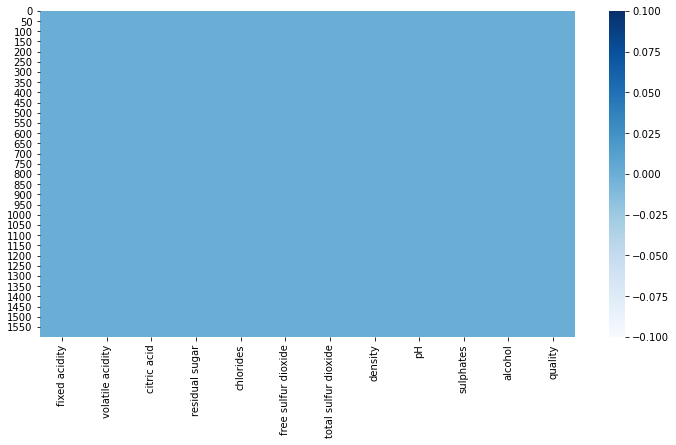

In [12]:
plt.figure(figsize=(12,6))
sns.heatmap(ds.isnull(), cmap='Blues')

Above Graphical representation is for missing values in the dataset if there were any missing values we can easily see using the above graphical model 

First lets find out how many classes are there for quality of the wine

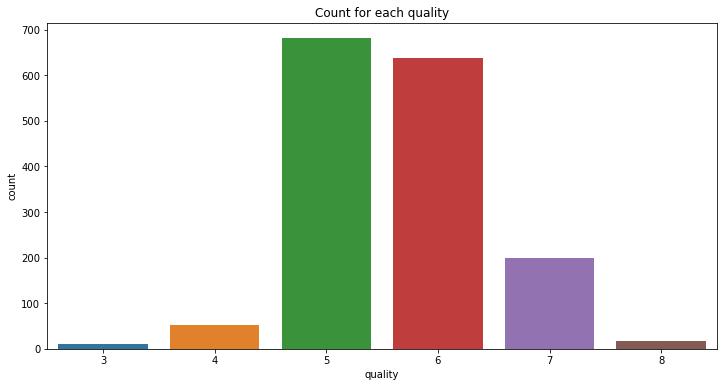

In [13]:
plt.figure(figsize=(12,6))
plt.title("Count for each quality")
sns.countplot('quality', data=ds)

From above graph we can figure out that the dataset contains 1 - 8 quality classes and we can see that most number wines are present in the category of 5 & 6 with an count nearly to 700

Lets see alcohol count in the dataset

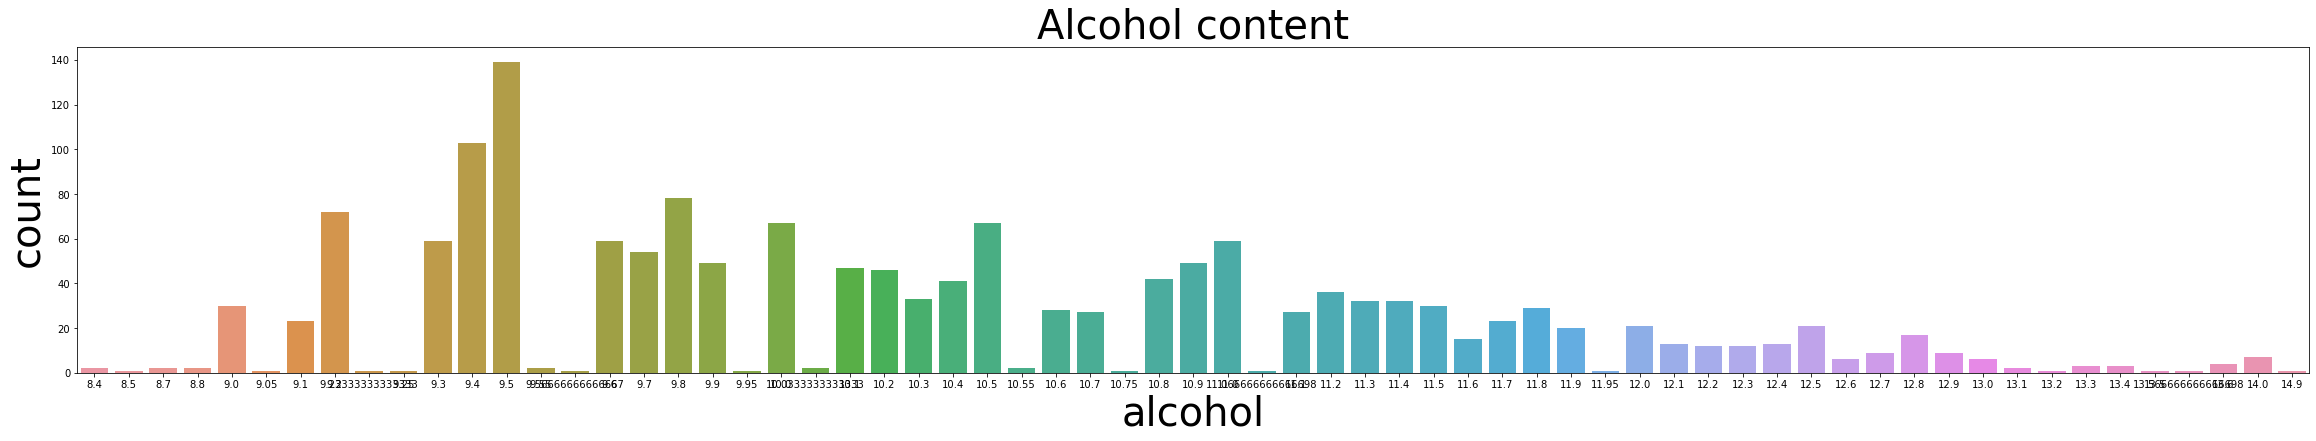

In [14]:
plt.figure(figsize=(40,6))
plt.title("Alcohol content", fontsize=40)
plt.xlabel("Alcohol", fontsize=40)
plt.ylabel("Count", fontsize=40)
sns.countplot('alcohol', data=ds)

By looking at the above graph we come to know that alcohol == 9.5 has the heighest count in the entire dataset following with 9.4 & 9.3

lets see if alcohol content increase or decrease the quality of wine

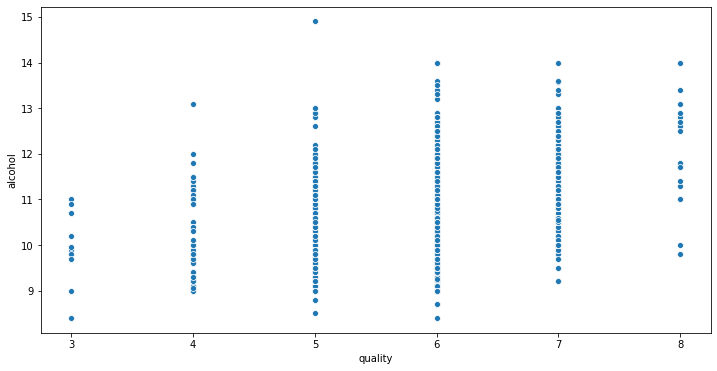

In [15]:
plt.figure(figsize=(12,6))
sns.scatterplot('quality', 'alcohol', data = ds)

By looking at the graph we can tell that alcohol level has some effect on quality of wine

Now lets see which column affects the quality at greater extent by using for loop we will make this happen

In [16]:
columns = ds.columns

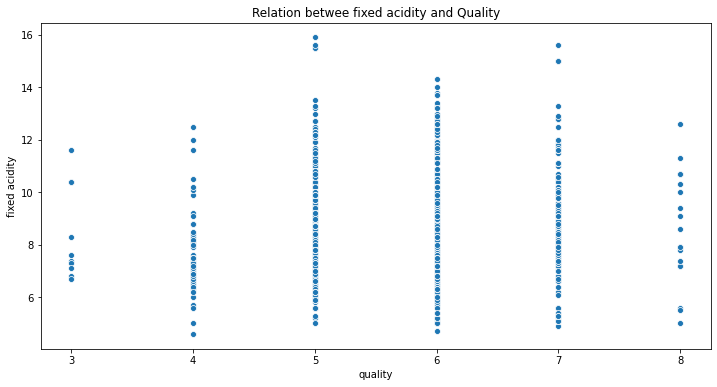

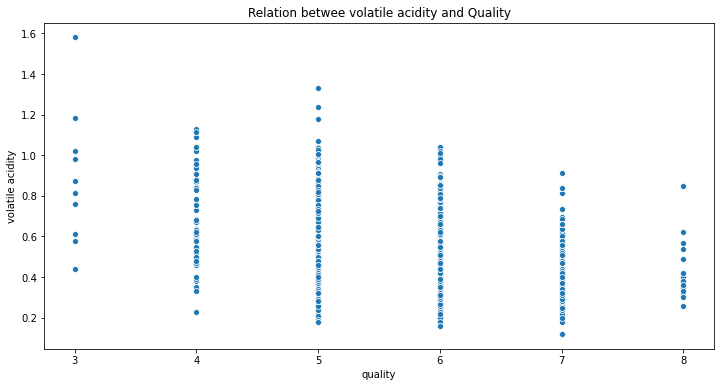

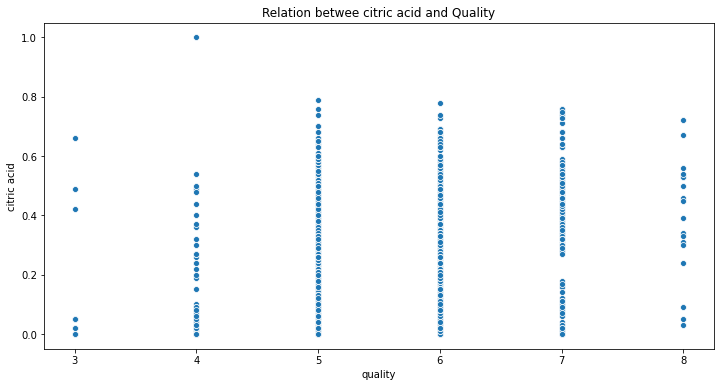

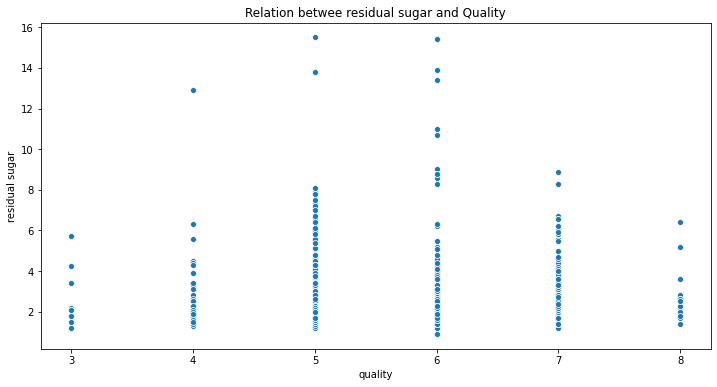

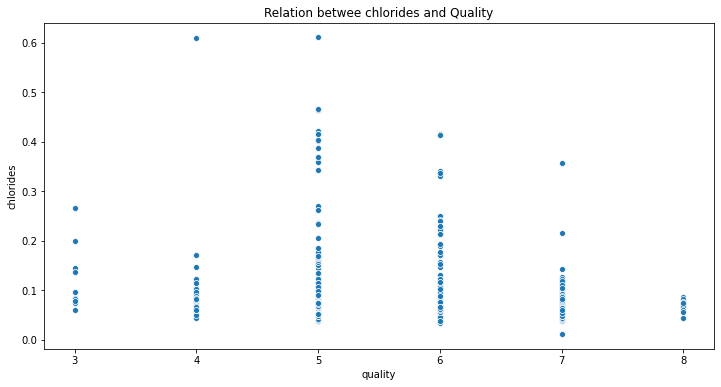

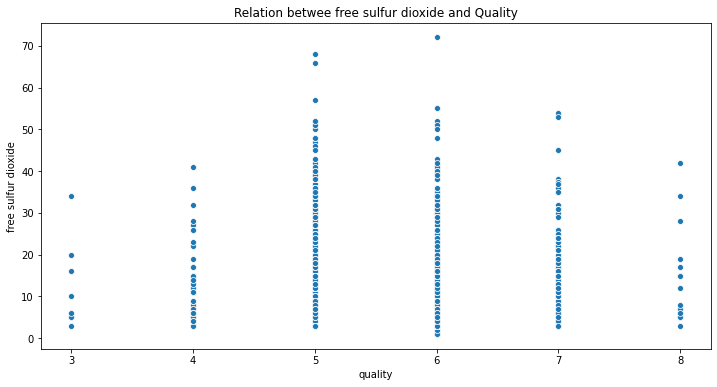

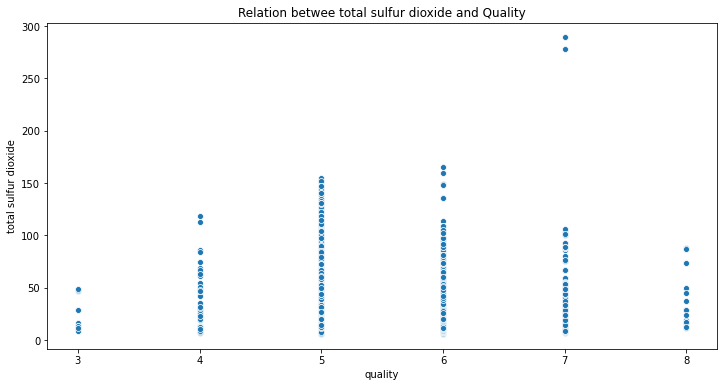

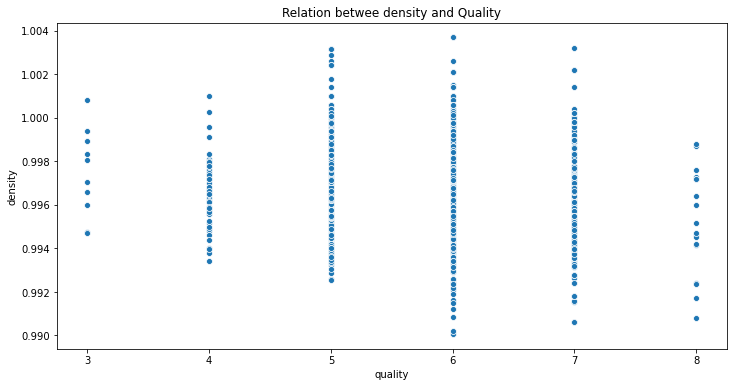

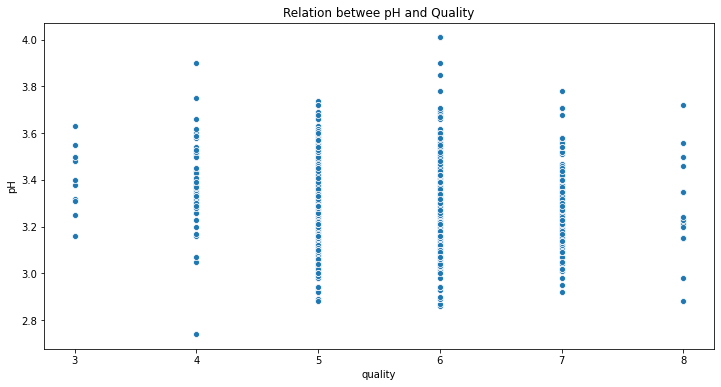

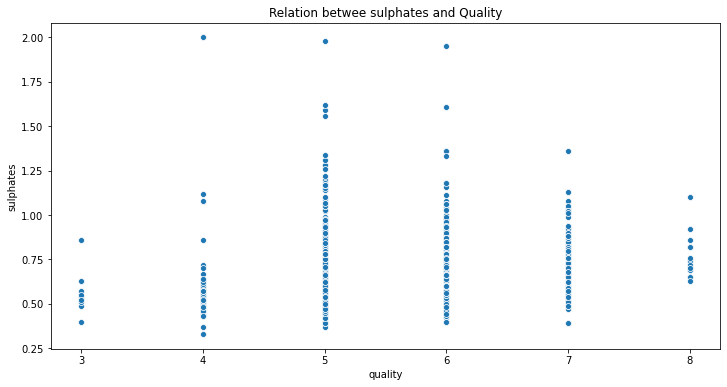

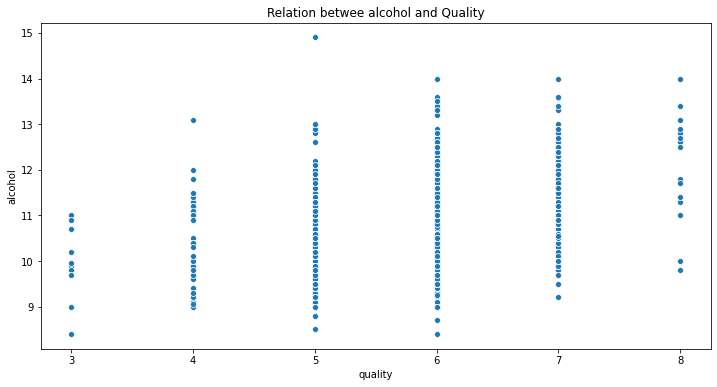

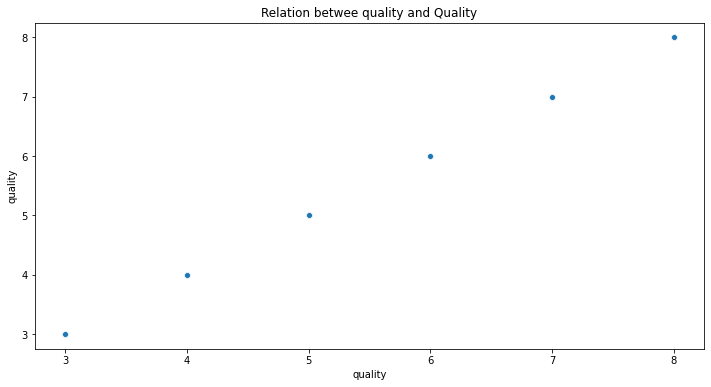

In [17]:
for c in columns:
    plt.figure(figsize=(12,6))
    plt.title("Relation betwee {} and Quality".format(c))
    sns.scatterplot('quality' , c, data = ds)

By looking at the above graph we come to know the follwing things

1) Wine has a great quality if fixed acidity is between 2 & 12
2) Wine has a great quality if volatile acidity is between 0.3 & 0.6
3) Citric Acid dosen't have that great relation with quality of wine
4) Wine quality is great if Residual sugar is between 2 & 3
5) Wine quality is great id chlorides is between 0.05 t0 0.1
6) Free Sulfure dioxide doesn't have that great realtion with quality of wine
7) Total Sulfur dioxide has some relation with quality of wine
8) Wine quality is great if the density is in range of 0.991 to 0,997
9) PH and wine quality doesn't have that great realtion with one another
10) Wine quality is great if the sulphate present is in between 0.60 to 1.00
11) Alcohol dosen't have a great relation with quality of wine

In [18]:
ds.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


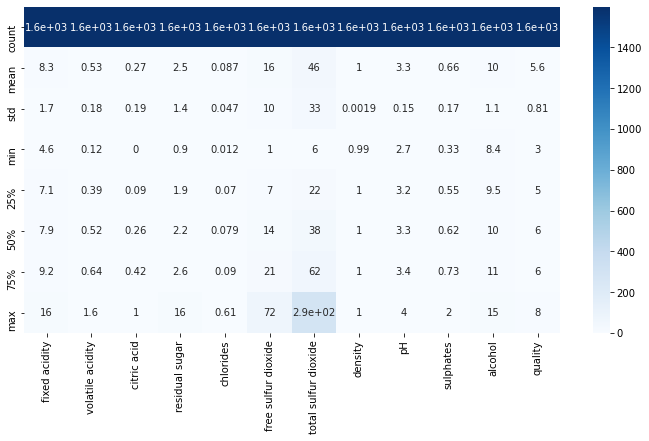

In [19]:
plt.figure(figsize=(12,6))
sns.heatmap(ds.describe(), cmap='Blues', annot=True)

By looking at the above graphical representaion we come to know that Total Sulfur dioxide has outliers

### Lets see a multivariate plot of the dataset 

<Figure size 864x432 with 0 Axes>

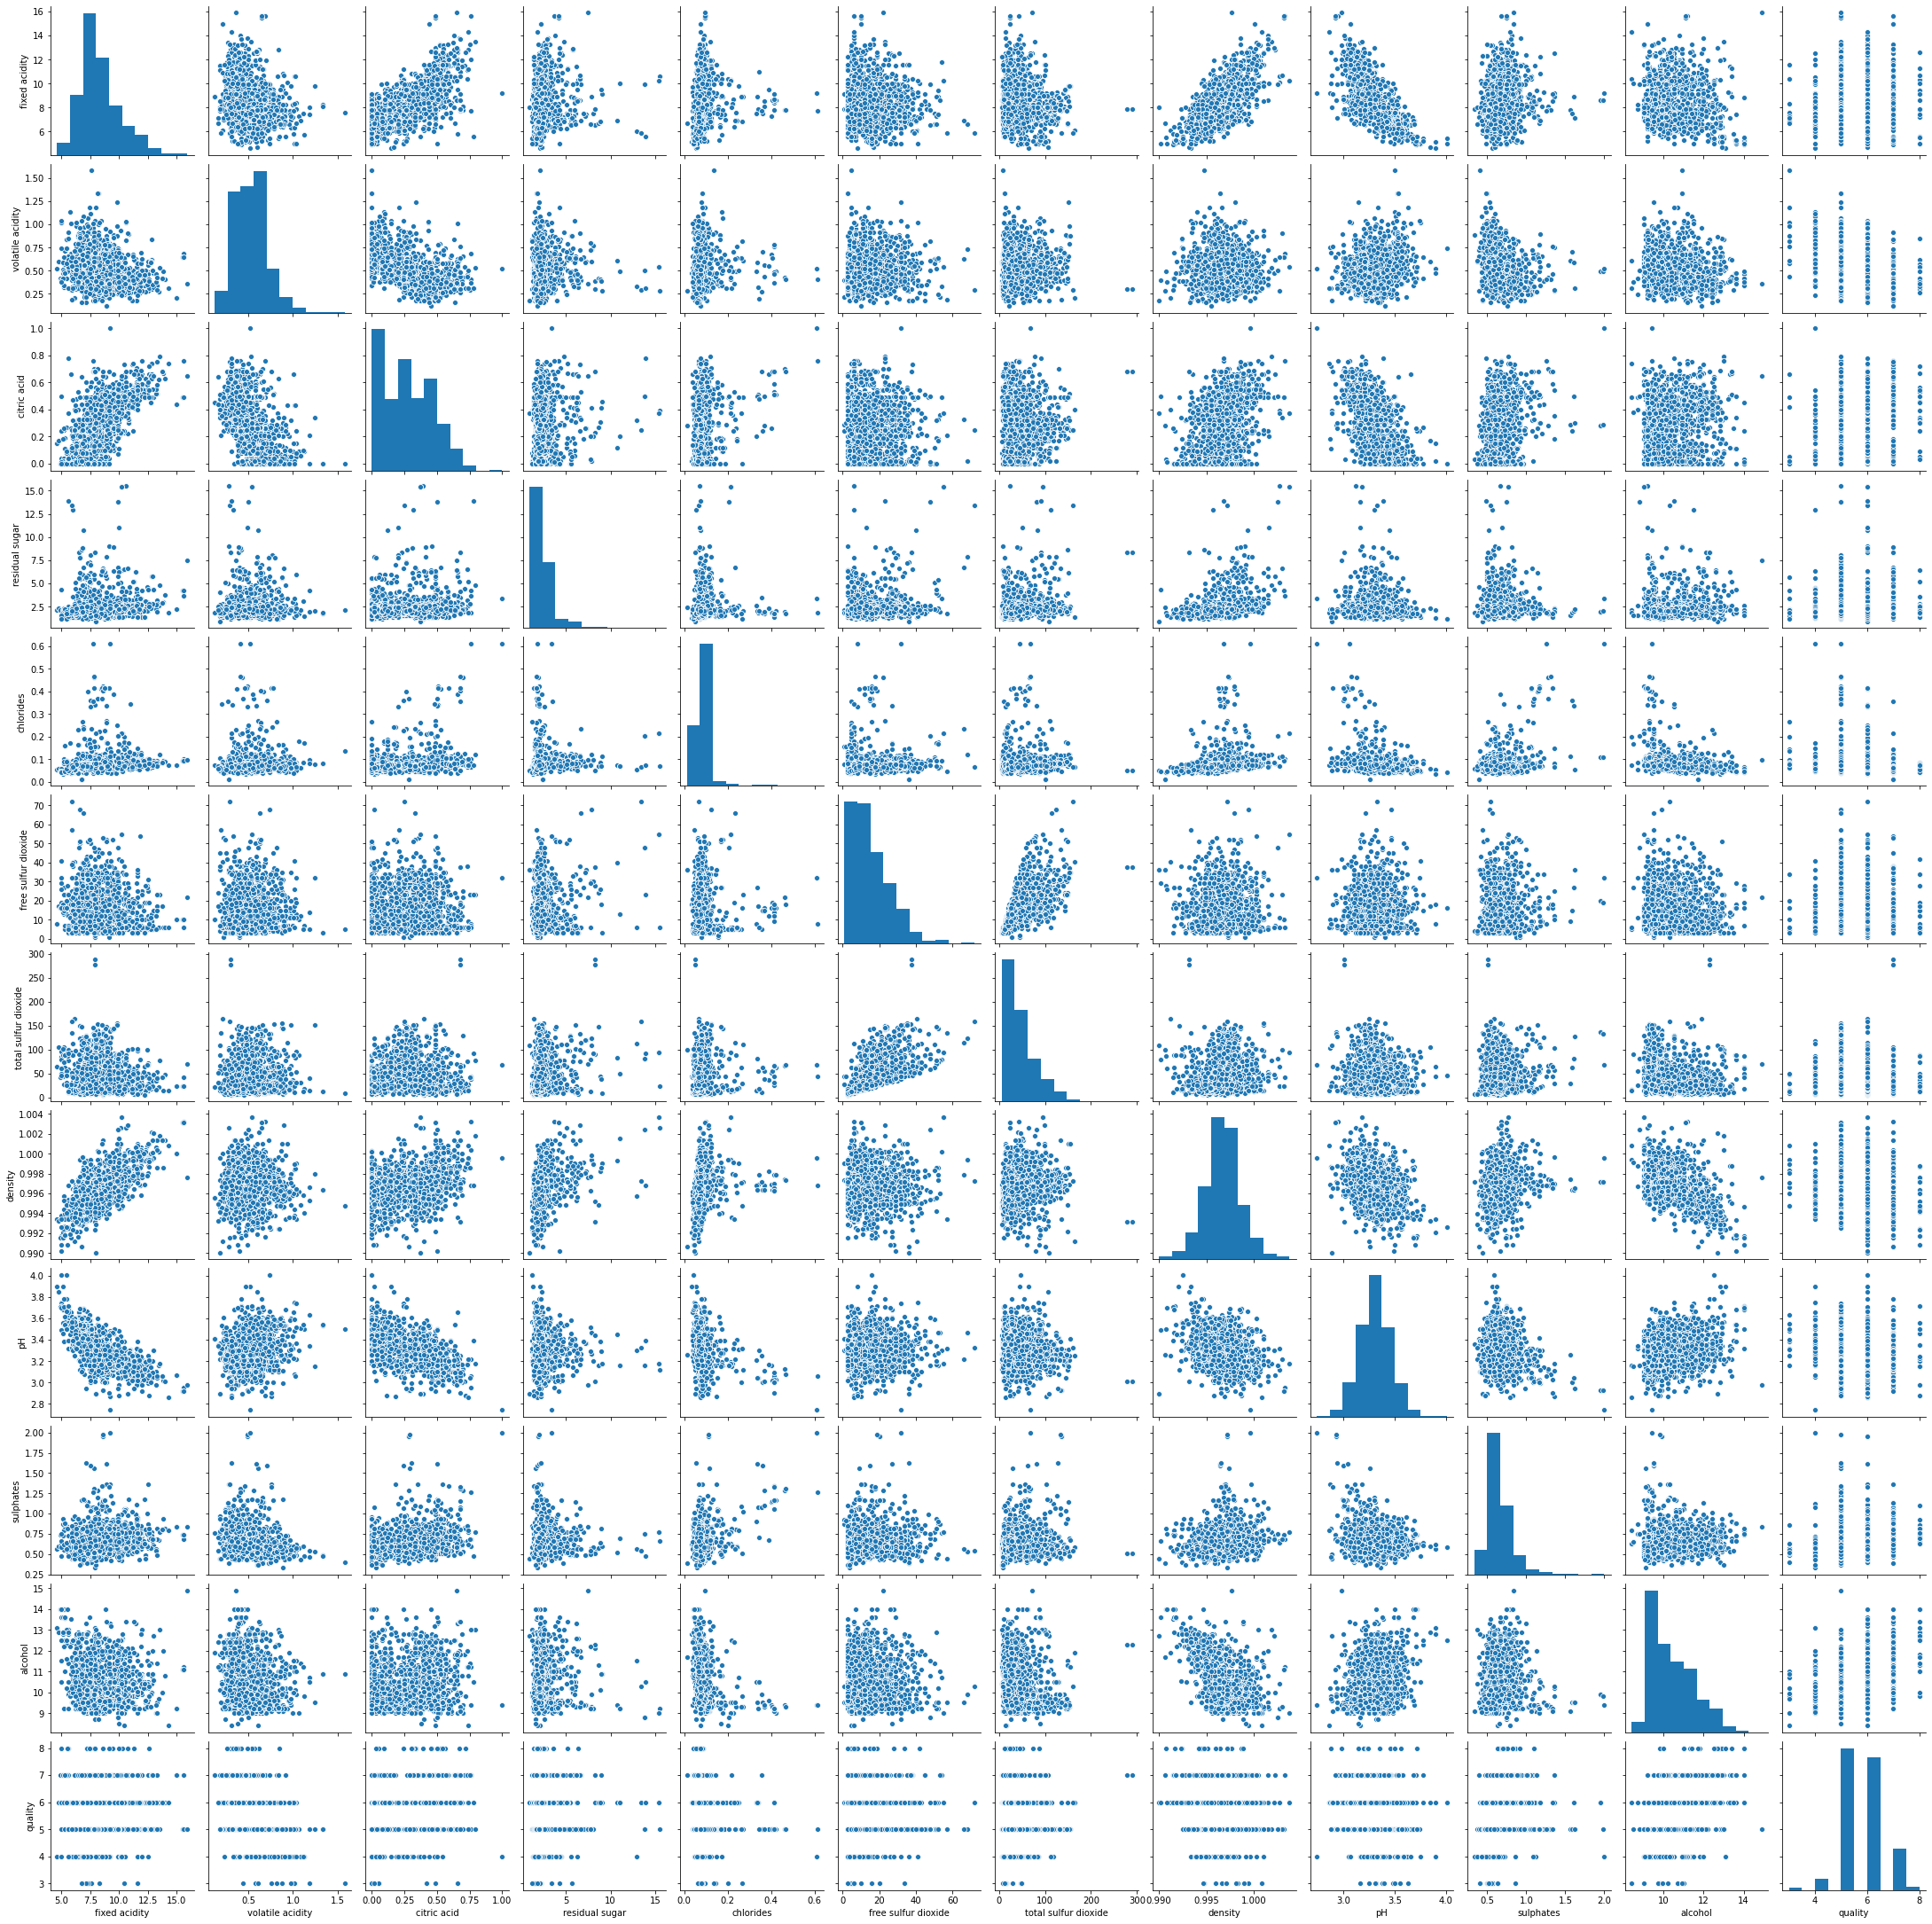

In [20]:
plt.figure(figsize=(12,6))
sns.pairplot(ds)

By looking at the above graph we can tell that we have positive, negative, neutral relation between the columns

Now lets see density plot to know the skewness in the data

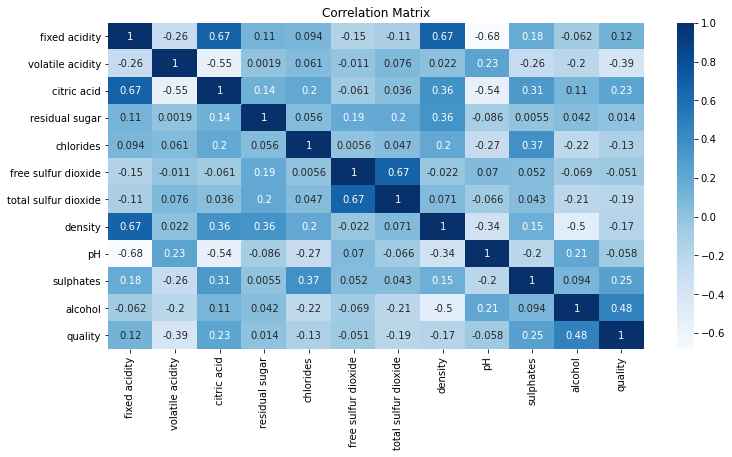

In [21]:
plt.figure(figsize = (12,6))
plt.title("Correlation Matrix")
sns.heatmap(ds.corr(), annot=True, cmap='Blues')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1214848e0>,
      dtype=object)

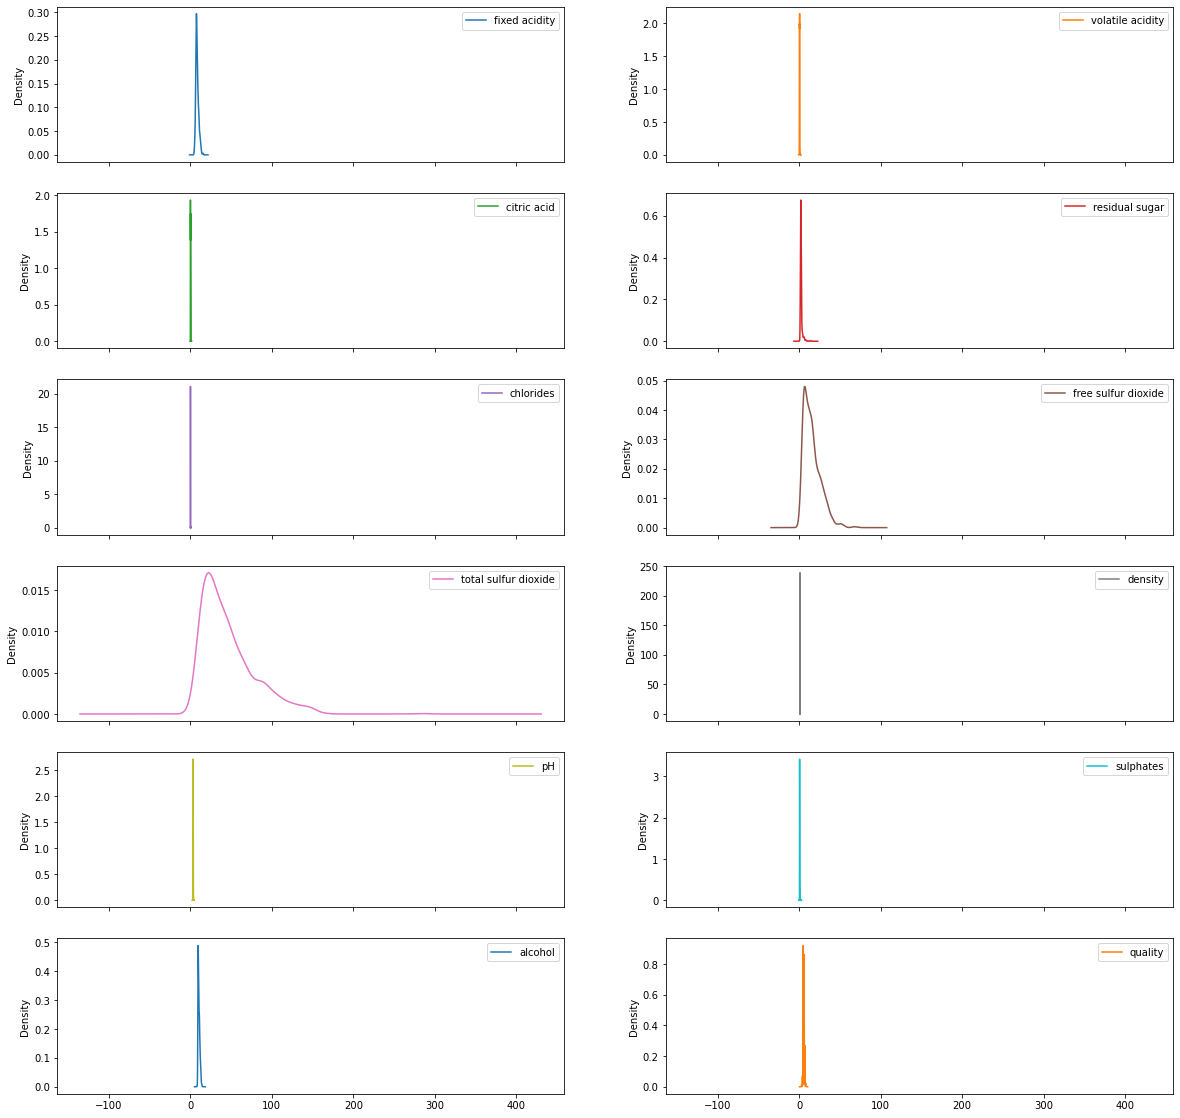

In [22]:
ds.plot(kind = 'kde', subplots = True, figsize = (20,20), layout = (6,2))

By looking at the data we can tell that the data is skewed now lets see the numeric value of skewness

In [23]:
ds['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

now we will change the quality column a bit but giving them 2 classes i.e if quality >=7 we will give it as 1 otherwise we will give it as 0

In [24]:
quality =[]
for i in ds['quality']:
    if i>=7:
        quality.append('Good')
    else:
        quality.append("Bad")

ds['quality'] = quality
        

In [25]:
ds['quality'].value_counts()

Bad     1382
Good     217
Name: quality, dtype: int64

As we have Changed the quality column in 2 classes Good & bad now we will see the skewness of the dataset

In [26]:
ds.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
dtype: float64

From above we can see the skewness of the data some of them are left skewed and some of them are normaly distributed so now we will see skewness in graphical format 

In [27]:
columns = columns.drop('quality')

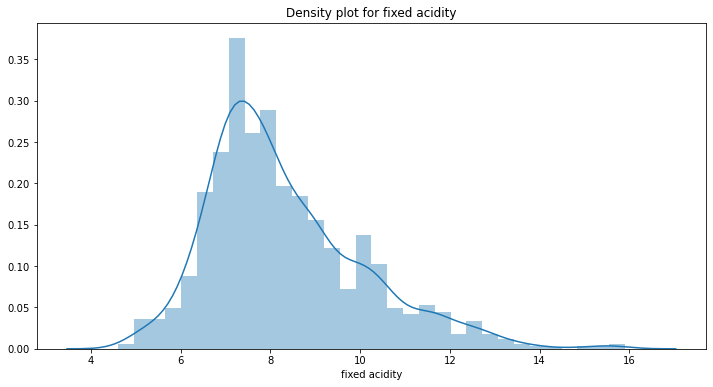

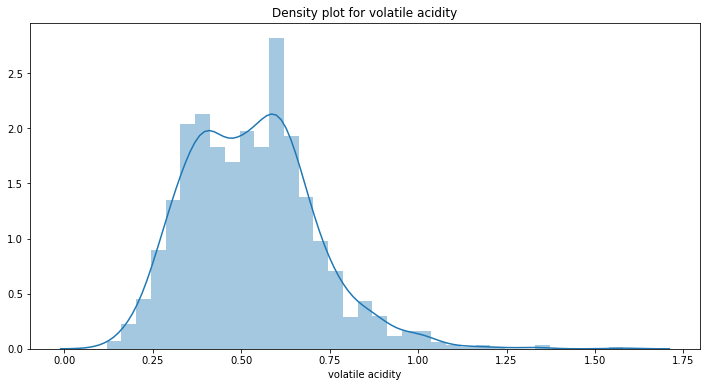

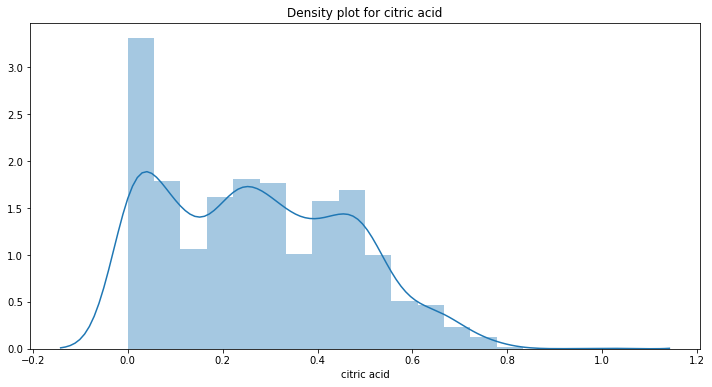

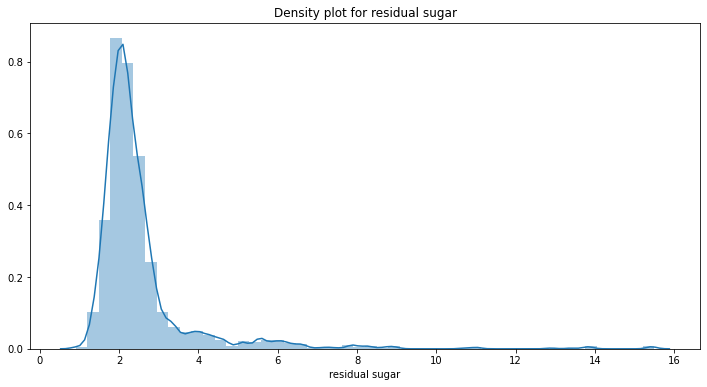

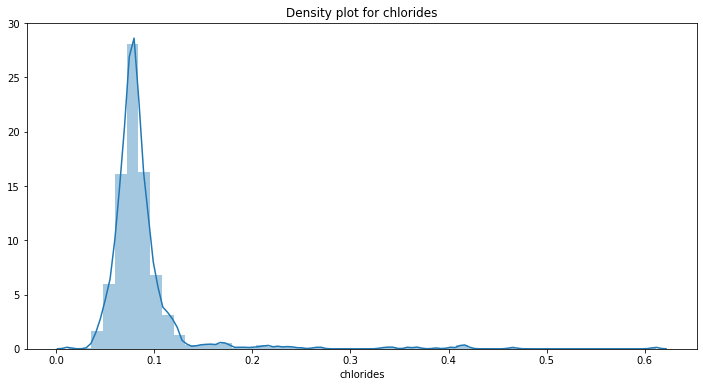

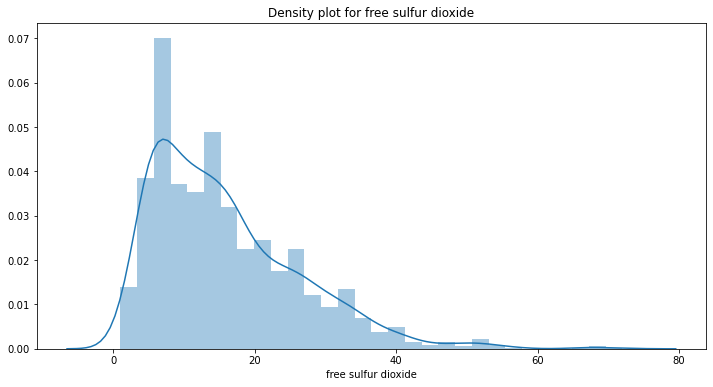

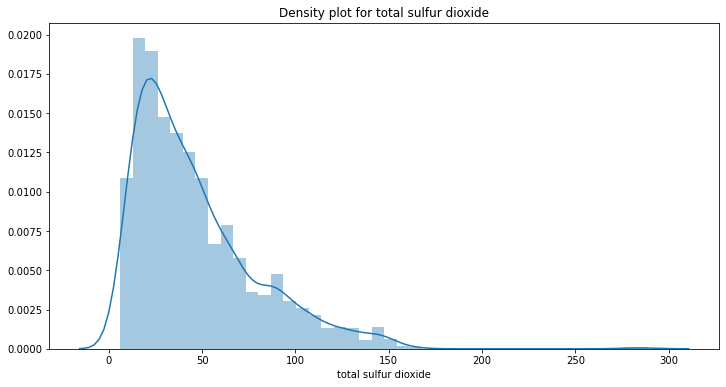

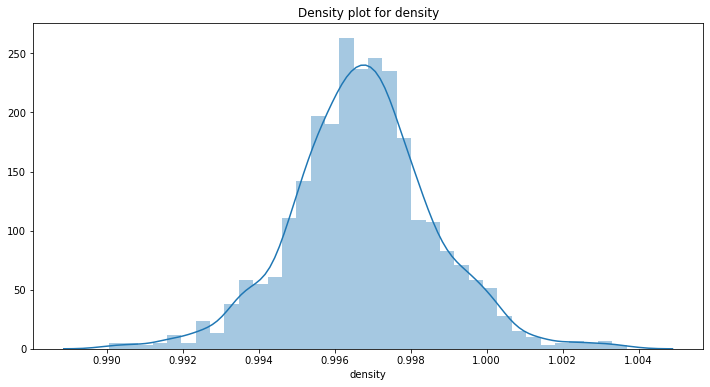

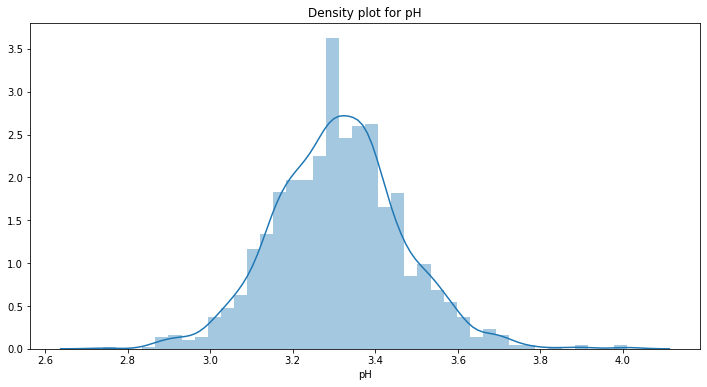

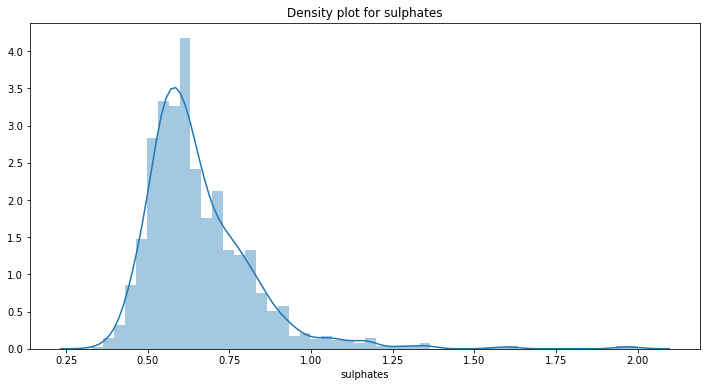

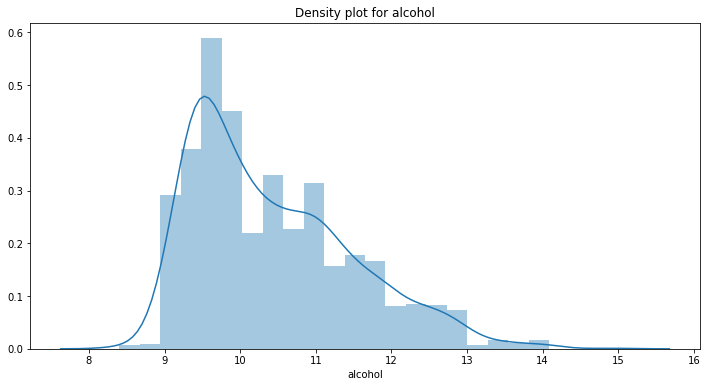

In [28]:
for c in columns:
    plt.figure(figsize = (12,6))
    plt.title("Density plot for {}".format(c))
    sns.distplot(ds[c])

From above we can see that the some of them are left skewed and some of them are normaly distributed

Now we will fix the skewness and change every column to normally distributed plot using box cox method lets first remove outliers and lets see if the data gets normaly distributed or not

Lets do label encoding for quality column

In [29]:
le = LabelEncoder()

In [30]:
dsnew = ds.apply(le.fit_transform)
dsnew.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,27,76,0,10,39,11,28,342,63,18,11,0
1,31,112,0,22,61,25,61,271,32,30,17,0
2,31,88,4,17,55,15,48,287,38,27,17,0
3,65,12,56,10,38,17,54,354,28,20,17,0
4,27,76,0,10,39,11,28,342,63,18,11,0


In [31]:
ds = dsnew

In [32]:
ds.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,27,76,0,10,39,11,28,342,63,18,11,0
1,31,112,0,22,61,25,61,271,32,30,17,0
2,31,88,4,17,55,15,48,287,38,27,17,0
3,65,12,56,10,38,17,54,354,28,20,17,0
4,27,76,0,10,39,11,28,342,63,18,11,0


We have successfully performed Lable Encoder and we can see that the object value has converted into numeric value the Column at which labelencoder was performed was at ds['quality'] column

Now we will remove the outliers from the dataset by using zscore method

In [33]:
zscr = np.abs(zscore(ds))
threshold = 3
print(np.where(zscr>3))

(array([   9,   11,   13,   14,   15,   17,   17,   19,   33,   38,   42,
         43,   57,   79,   81,   81,   83,   83,   86,   88,   91,   92,
        106,  106,  109,  120,  126,  127,  134,  147,  151,  151,  163,
        164,  169,  169,  181,  199,  226,  226,  240,  243,  244,  258,
        258,  274,  278,  281,  291,  307,  308,  324,  325,  339,  340,
        347,  354,  369,  374,  377,  378,  381,  391,  396,  396,  400,
        400,  413,  415,  442,  451,  480,  494,  501,  502,  515,  515,
        515,  517,  522,  541,  544,  553,  554,  555,  557,  566,  567,
        568,  584,  591,  595,  614,  639,  649,  651,  652,  652,  666,
        672,  672,  684,  690,  692,  692,  705,  723,  724,  730,  754,
        776,  777,  780,  795,  882,  889,  911,  917,  923,  925,  926,
        982, 1038, 1043, 1051, 1051, 1071, 1074, 1077, 1078, 1079, 1079,
       1081, 1081, 1098, 1131, 1147, 1154, 1158, 1165, 1175, 1186, 1231,
       1235, 1244, 1244, 1244, 1260, 1260, 1276, 1

In [34]:
print("Before removing outliers shape is:", ds.shape)
dsnew = ds[(zscr<3).all(axis = 1)]
print("After removing outliers shape is:", dsnew.shape)

Before removing outliers shape is: (1599, 12)
After removing outliers shape is: (1448, 12)


Now we know that how many outliers where removed lets check the data loss from outlier removal if it is less than 10% we will perform the removal if it is more we will only fix the skewness

In [35]:
r, c = ds.shape
r1, c1 = dsnew.shape

In [36]:
print("Total Data Loss:{:.2f}%".format(100 - (r1/r)*100))

Total Data Loss:9.44%


as the data loss is below 10% we will perform outlier removal

In [37]:
ds = dsnew

In [38]:
ds.shape

(1448, 12)

After outlier removal lets see the skewness of data

In [39]:
ds.skew()

fixed acidity           0.783264
volatile acidity        0.797320
citric acid             0.304419
residual sugar          1.743291
chlorides               0.765555
free sulfur dioxide     0.824467
total sulfur dioxide    1.104911
density                -0.333087
pH                      0.159715
sulphates               0.812809
alcohol                 0.572177
quality                 2.116793
dtype: float64

By looking at the above statistic we can say that definetly the skewness of data is reduced lets see the graohical representation of density plot as well as box plot for outliers in the dataset

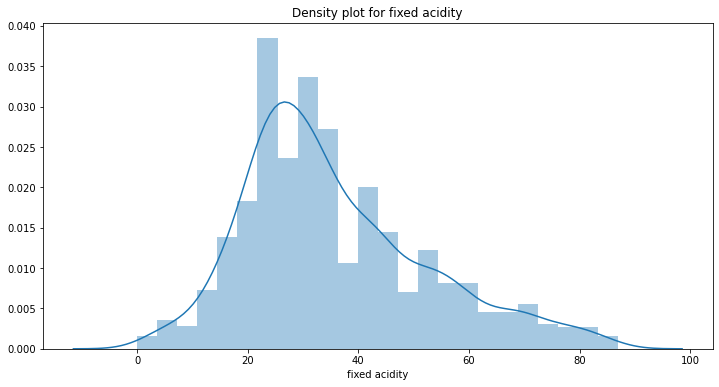

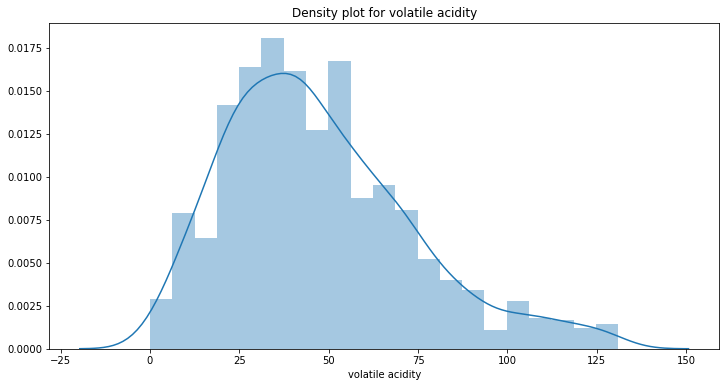

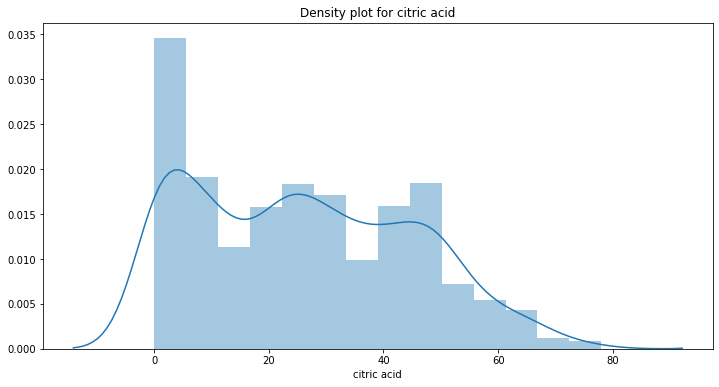

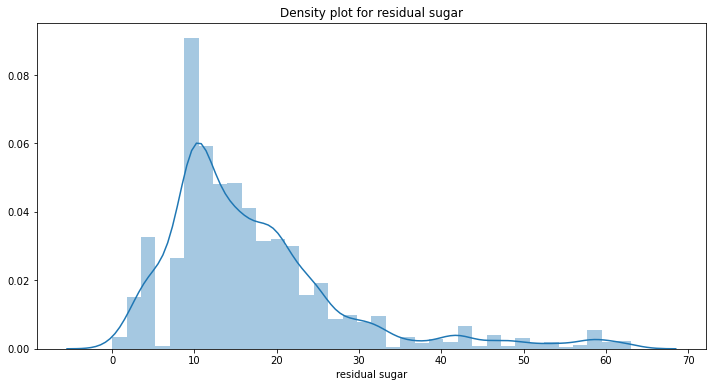

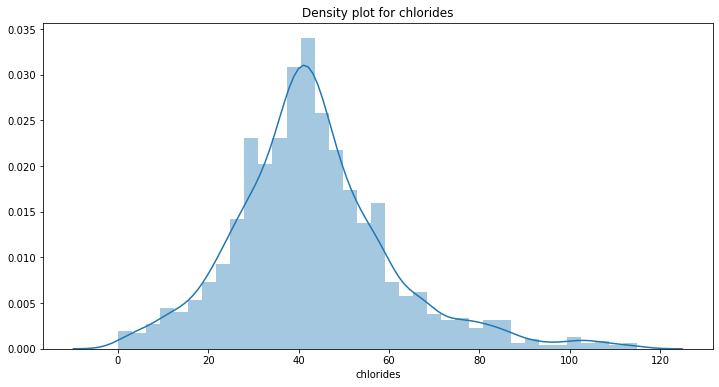

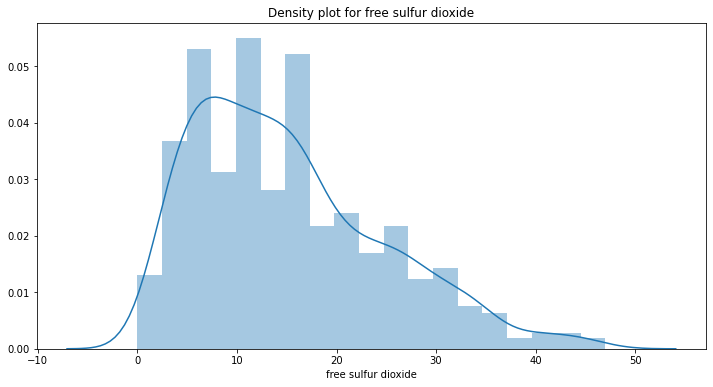

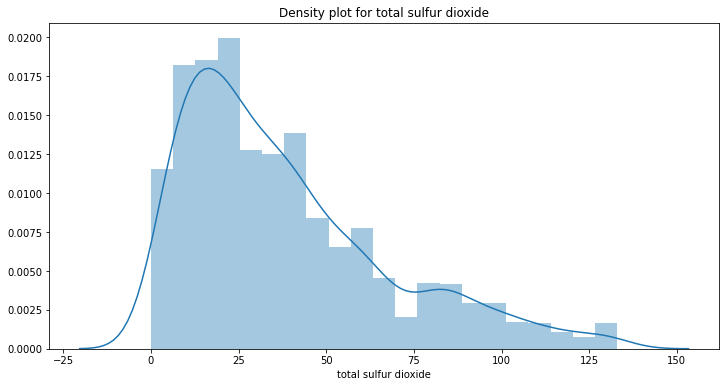

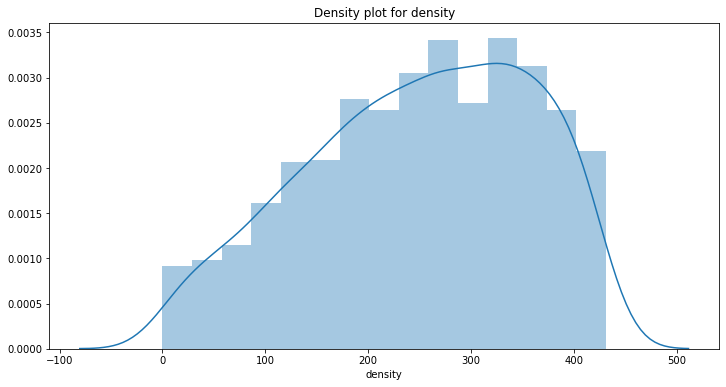

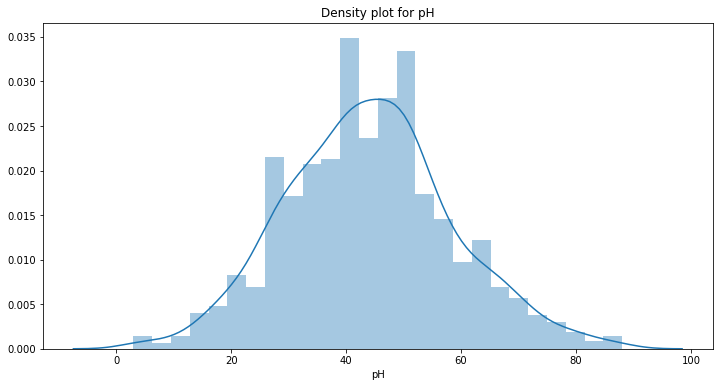

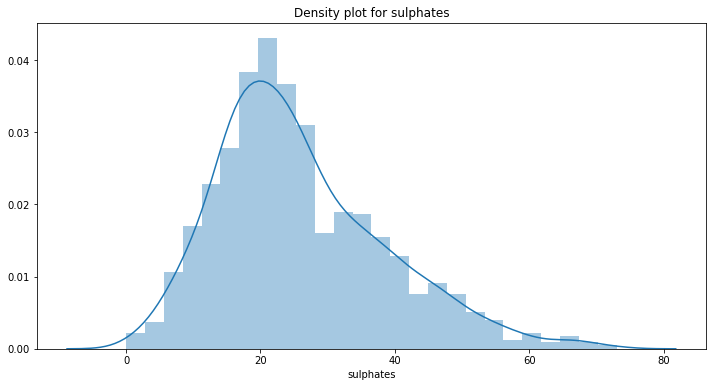

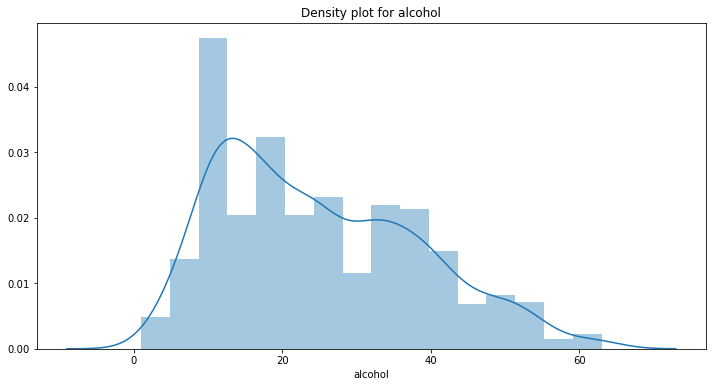

In [40]:
for c in columns:
    plt.figure(figsize = (12,6))
    plt.title("Density plot for {}".format(c))
    sns.distplot(ds[c])

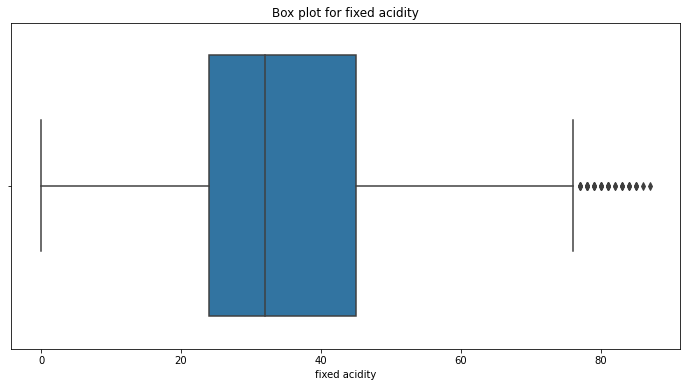

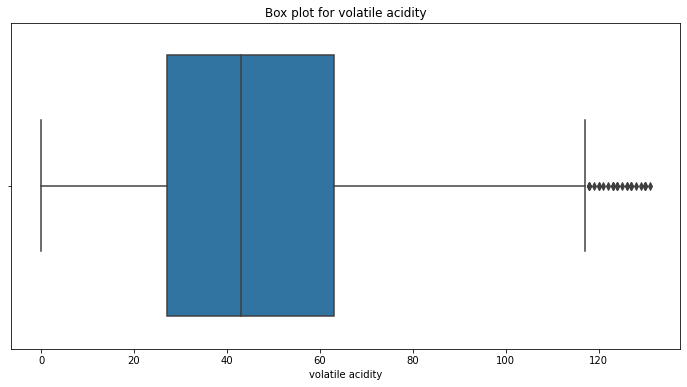

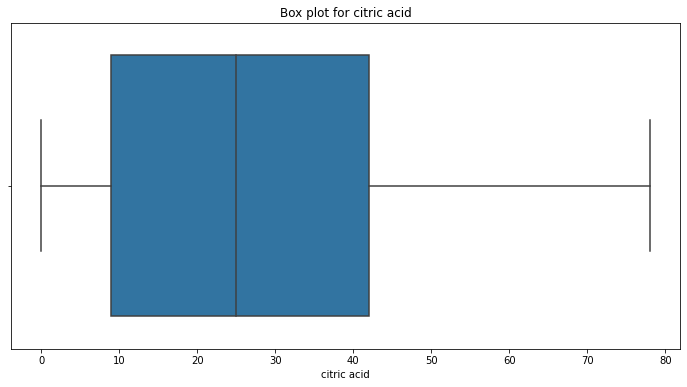

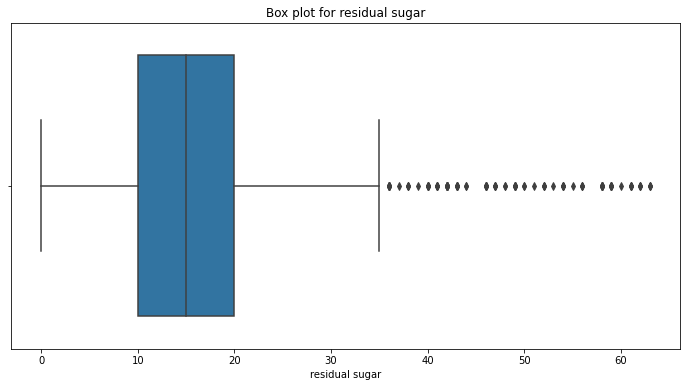

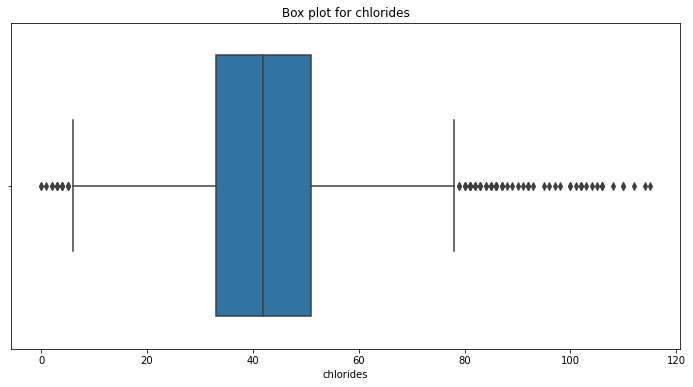

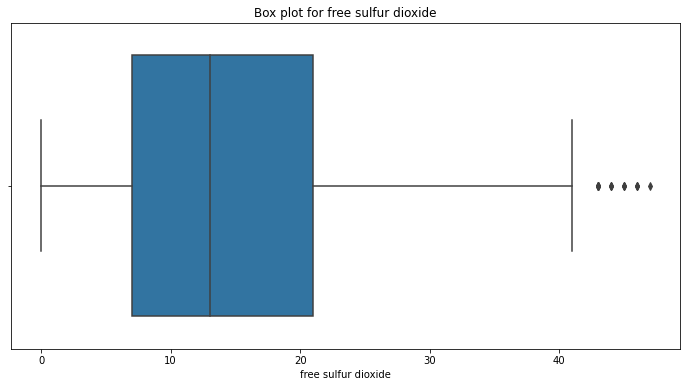

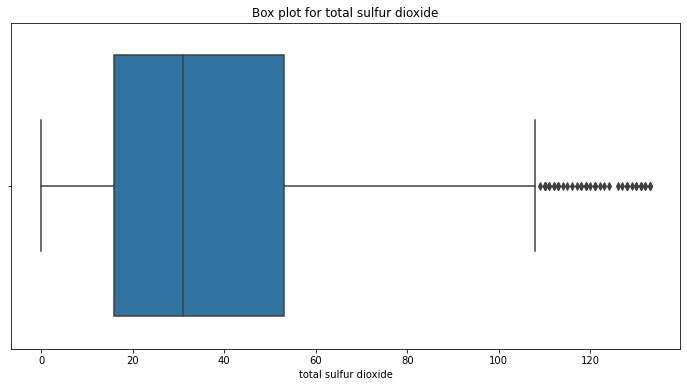

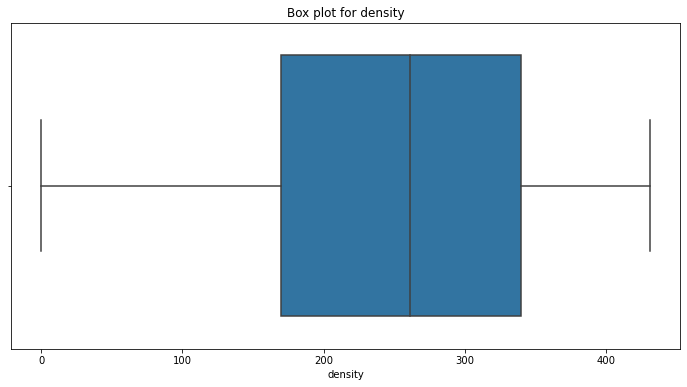

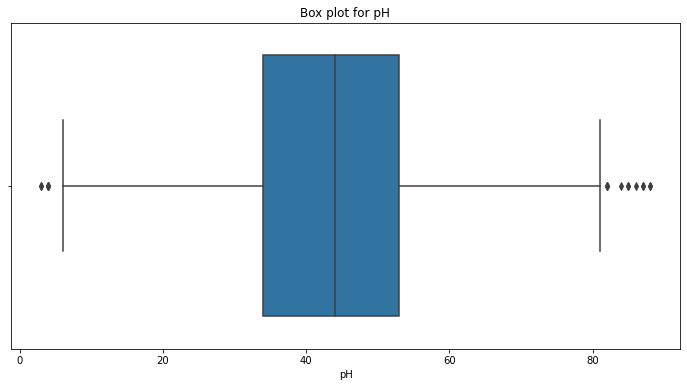

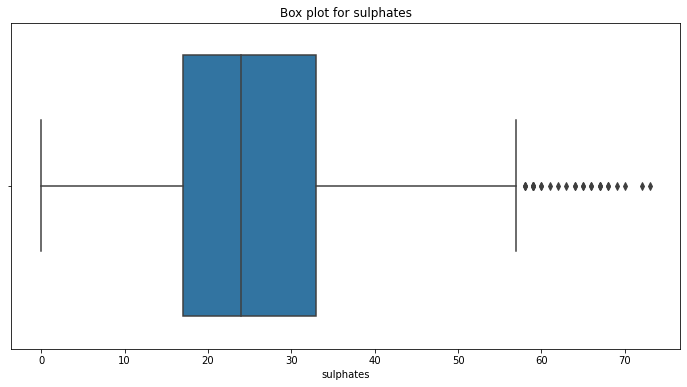

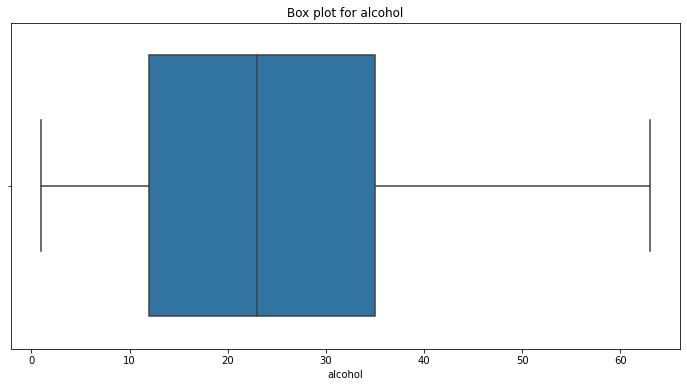

In [41]:
for c in columns:
    plt.figure(figsize = (12,6))
    plt.title("Box plot for {}".format(c))
    sns.boxplot(ds[c])

By looking at the density plot we can say that the Skewness has reduced to some extent but we have to fix the skewness more and to increase the accuracy

And for boxplot many values are near to the boxplot threshold line so we will let that value as it is

In [42]:
ds.skew()

fixed acidity           0.783264
volatile acidity        0.797320
citric acid             0.304419
residual sugar          1.743291
chlorides               0.765555
free sulfur dioxide     0.824467
total sulfur dioxide    1.104911
density                -0.333087
pH                      0.159715
sulphates               0.812809
alcohol                 0.572177
quality                 2.116793
dtype: float64

Now we will divide out dataset in 2 different parts i.e traning data and testing data

In [43]:
X = ds.drop('quality', axis = 1)
Y = ds['quality']

We will only perform skewness removal in our independent variable as the dependent variable only has 2 classes

In [44]:
X.skew()

fixed acidity           0.783264
volatile acidity        0.797320
citric acid             0.304419
residual sugar          1.743291
chlorides               0.765555
free sulfur dioxide     0.824467
total sulfur dioxide    1.104911
density                -0.333087
pH                      0.159715
sulphates               0.812809
alcohol                 0.572177
dtype: float64

In [45]:
dsnew = power_transform(X)
dsnew = pd.DataFrame(dsnew, columns = X.columns)
dsnew.skew()

fixed acidity           0.029522
volatile acidity       -0.009330
citric acid            -0.275544
residual sugar          0.016816
chlorides               0.103753
free sulfur dioxide    -0.039112
total sulfur dioxide   -0.038013
density                -0.288872
pH                      0.009935
sulphates               0.014561
alcohol                -0.048792
dtype: float64

As we can see that all the values are under 0.5 so we can say that all the values are normally distributed let us conver dsnew to our independent variable X

In [46]:
X = dsnew

Lets see density plot for X

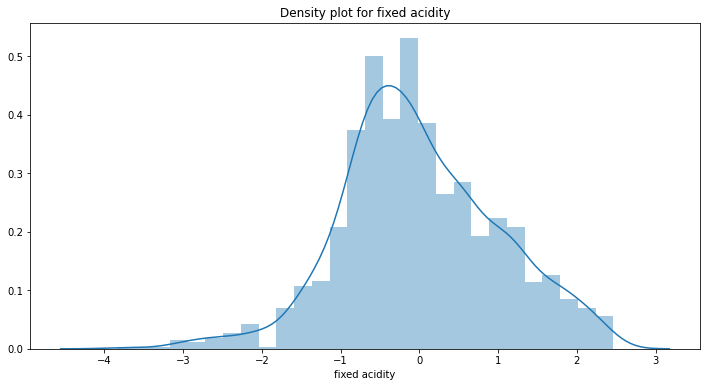

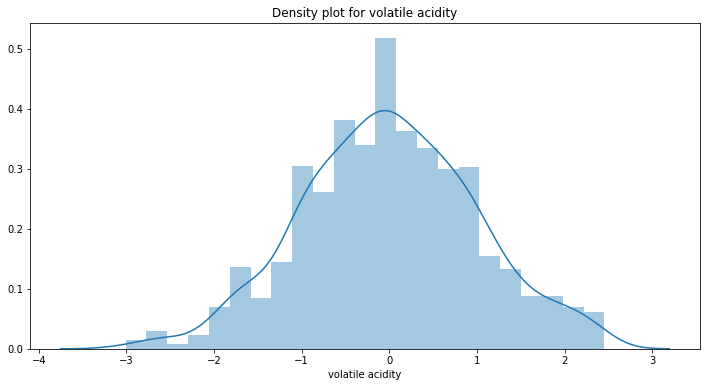

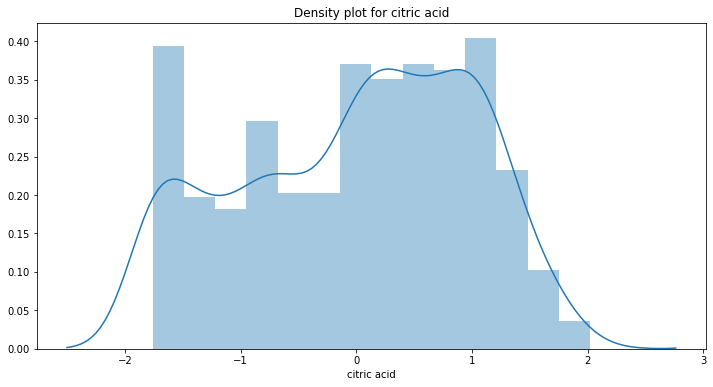

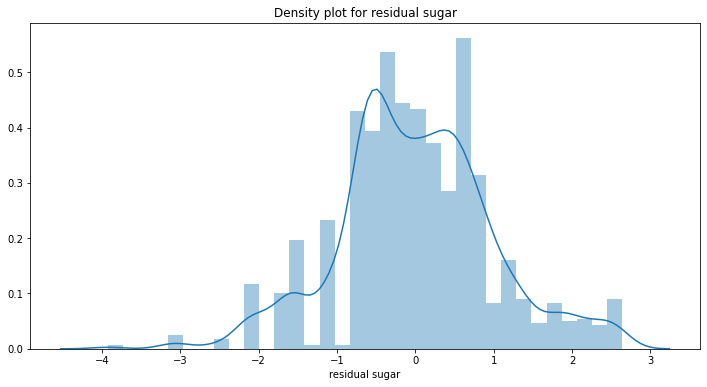

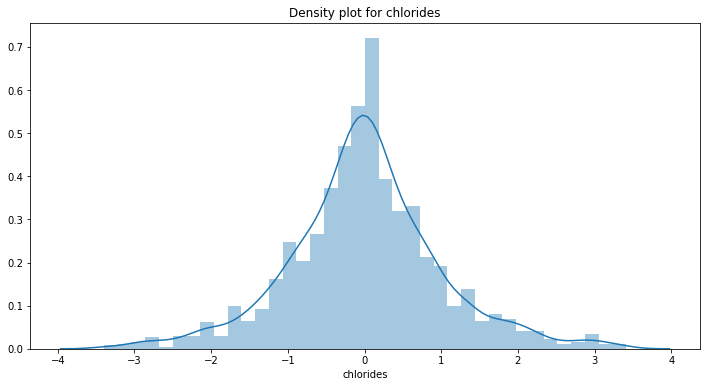

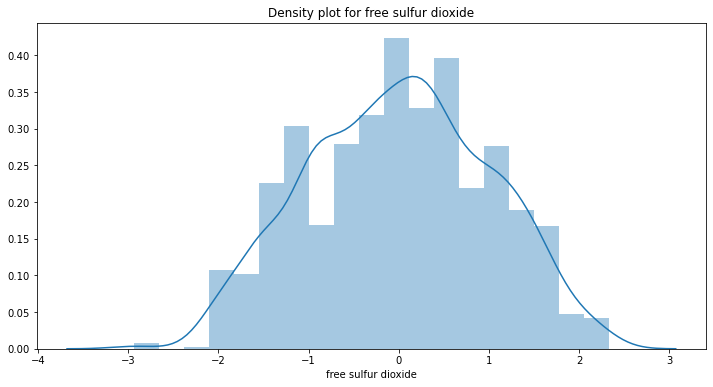

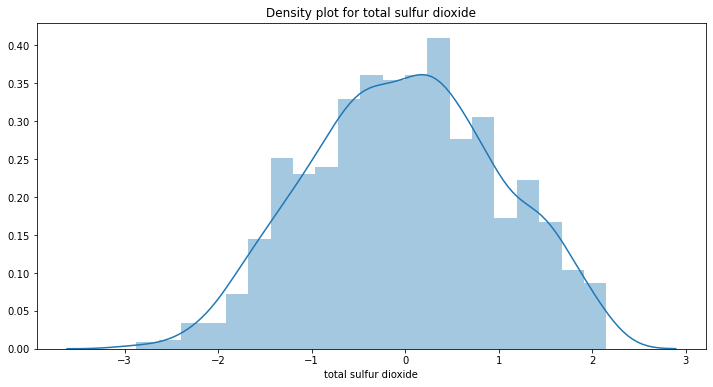

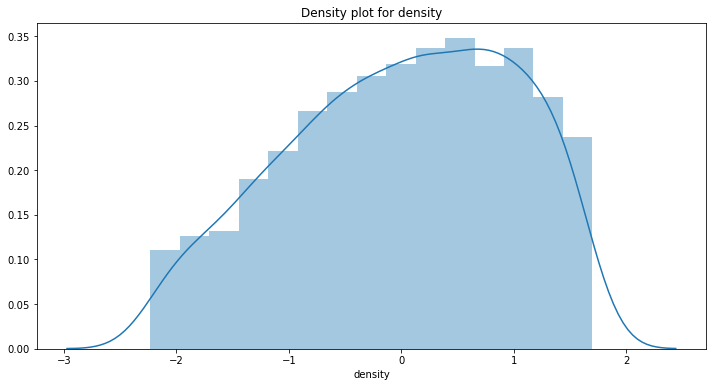

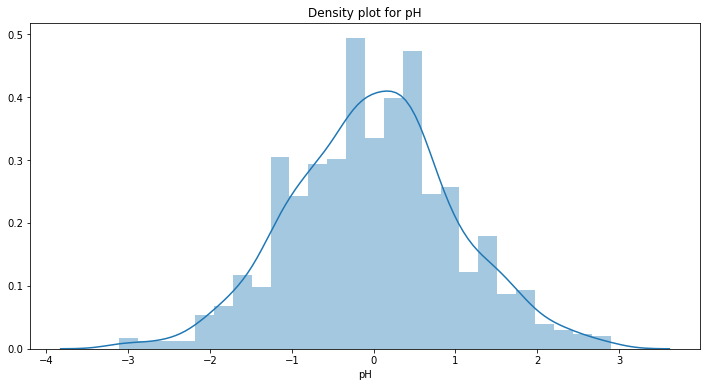

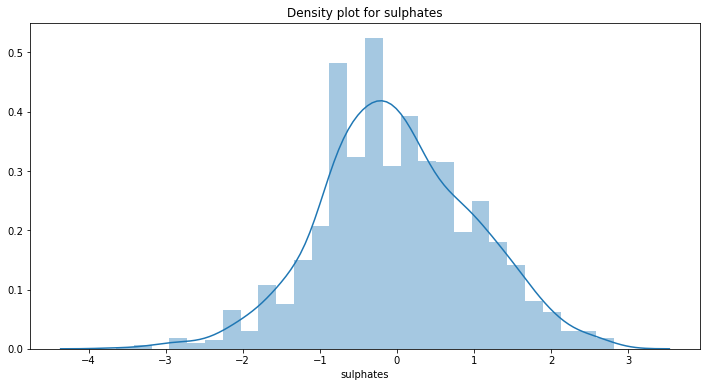

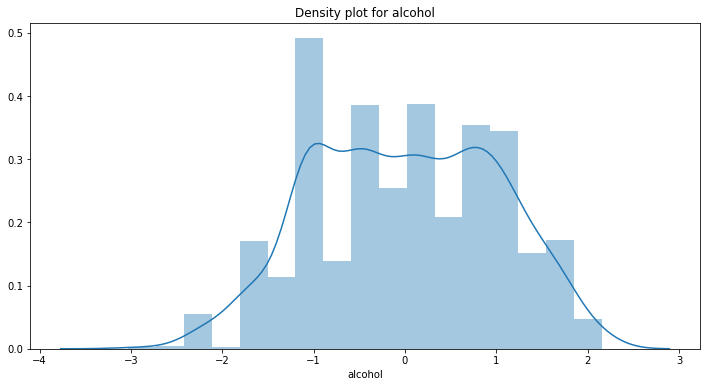

In [47]:
for c in columns:
    plt.figure(figsize = (12,6))
    plt.title("Density plot for {}".format(c))
    sns.distplot(X[c])

By looking at the above graphical representation we can see that all the values are normally distributed and the skewness is reduced

In [48]:
print(X.shape)
print(Y.shape)

(1448, 11)
(1448,)


In [49]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.430735,1.080163,-1.759843,-0.579586,-0.164530,-0.257629,-0.090114,0.853502,1.296688,-0.554249,-1.096673
1,-0.163050,2.021736,-1.759843,0.679141,1.015258,1.056978,0.919862,0.186291,-0.816312,0.442658,-0.470433
2,-0.163050,1.415540,-1.209569,0.247232,0.710376,0.197246,0.586950,0.335990,-0.391635,0.218088,-0.470433
3,1.594648,-1.598513,1.349027,-0.579586,-0.222899,0.394774,0.747997,0.966966,-1.105178,-0.366851,-0.470433
4,-0.430735,1.080163,-1.759843,-0.579586,-0.164530,-0.257629,-0.090114,0.853502,1.296688,-0.554249,-1.096673


lets Scale the values for our independent variables.

In [50]:
sc = StandardScaler()

In [51]:
x = sc.fit_transform(X)
x = pd.DataFrame(x, columns = X.columns)
x.head()
X = x
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.430735,1.080163,-1.759843,-0.579586,-0.164530,-0.257629,-0.090114,0.853502,1.296688,-0.554249,-1.096673
1,-0.163050,2.021736,-1.759843,0.679141,1.015258,1.056978,0.919862,0.186291,-0.816312,0.442658,-0.470433
2,-0.163050,1.415540,-1.209569,0.247232,0.710376,0.197246,0.586950,0.335990,-0.391635,0.218088,-0.470433
3,1.594648,-1.598513,1.349027,-0.579586,-0.222899,0.394774,0.747997,0.966966,-1.105178,-0.366851,-0.470433
4,-0.430735,1.080163,-1.759843,-0.579586,-0.164530,-0.257629,-0.090114,0.853502,1.296688,-0.554249,-1.096673


As we have done with standard scaler lets divide the data into X_train, X_test, Y_train, Y_test for our model building

In [52]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.22, random_state = 42)

Above we are using random_state as 42 lets see the accuracy score at random_state = 42 then we will find the best random_state

In [53]:
lr = LogisticRegression()
lr.fit(X_train, Y_train)
print("Traning Score:", lr.score(X_train, Y_train))
predlr = lr.predict(X_test)
print("Testing Accuracy Score:", accuracy_score(Y_test, predlr))
print("Classification Report", classification_report(Y_test, predlr))
print("Confusion Matrix:", confusion_matrix(Y_test, predlr))

Traning Score: 0.8830823737821081
Testing Accuracy Score: 0.8652037617554859
Classification Report               precision    recall  f1-score   support

           0       0.89      0.96      0.92       271
           1       0.59      0.35      0.44        48

    accuracy                           0.87       319
   macro avg       0.74      0.65      0.68       319
weighted avg       0.85      0.87      0.85       319

Confusion Matrix: [[259  12]
 [ 31  17]]


By looking at the above model we can see the model is giving accuracy score of 86% at random_state = 42 now lets find the best randomstate for all the models

In [54]:
maxacc = 0
maxrs = 0
for i in range(1,1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.22, random_state = i)
    lr = LogisticRegression()
    lr.fit(X_train, Y_train)
    predlr = lr.predict(X_test)
    acc = accuracy_score(Y_test, predlr)
    if acc>maxacc:
        maxacc = acc
        maxrs = i
        print("Best Accuracy is {} at random State {}".format(maxacc,maxrs))
print('\n')
print("Maximum Accuracy is {} at Random State {}".format(maxacc, maxrs))

Best Accuracy is 0.877742946708464 at random State 1
Best Accuracy is 0.8996865203761756 at random State 5
Best Accuracy is 0.9059561128526645 at random State 34
Best Accuracy is 0.9122257053291536 at random State 43
Best Accuracy is 0.9153605015673981 at random State 53
Best Accuracy is 0.9216300940438872 at random State 234
Best Accuracy is 0.9310344827586207 at random State 382


Maximum Accuracy is 0.9310344827586207 at Random State 382


By looking at the above tab we can say that model has Highest Accuracy as 93% at random_state 382 now lets try all the Classification model at random_stste 382

In [55]:
models = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), AdaBoostClassifier(), SVC(), GaussianNB(), KNeighborsClassifier()]

In [56]:
X_train, X_test, Y_train, Y_test = train_test_split(X ,Y, test_size = 0.22, random_state = 382)

Now we will check accuracy score for each and every algorithm using for loop

In [57]:
for m in models:
    print("Model Name is {}".format(m))
    m.fit(X_train, Y_train)
    print("Traning Score", m.score(X_train, Y_train))
    pred = m.predict(X_test)
    print("Testing Score", accuracy_score(Y_test, pred))
    print("Classification report", classification_report(Y_test, pred))
    print("Confusion Matrix", confusion_matrix(Y_test, pred))

Model Name is LogisticRegression()
Traning Score 0.8768821966341895
Testing Score 0.9310344827586207
Classification report               precision    recall  f1-score   support

           0       0.95      0.98      0.96       286
           1       0.72      0.55      0.62        33

    accuracy                           0.93       319
   macro avg       0.83      0.76      0.79       319
weighted avg       0.93      0.93      0.93       319

Confusion Matrix [[279   7]
 [ 15  18]]
Model Name is DecisionTreeClassifier()
Traning Score 1.0
Testing Score 0.896551724137931
Classification report               precision    recall  f1-score   support

           0       0.95      0.93      0.94       286
           1       0.50      0.61      0.55        33

    accuracy                           0.90       319
   macro avg       0.73      0.77      0.74       319
weighted avg       0.91      0.90      0.90       319

Confusion Matrix [[266  20]
 [ 13  20]]
Model Name is RandomForestClassi

From above we can say that RandomForestClassifier() has the heighest accuracy of 94%

Now we will perform all the prediction for all the model and then we will find accuracy score for every variable and then we will perform cross validation score so we can find out that the model is not overfitted and then we will check difference between the original accuracy score and the cross validation score

Performing model fitting for every Algorithm

In [58]:
lr = LogisticRegression()
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
adb = AdaBoostClassifier()
svc = SVC()
gnb = GaussianNB()
knn = KNeighborsClassifier()

In [59]:
lr.fit(X_train, Y_train)
predlr = lr.predict(X_test)
acclr = accuracy_score(Y_test, predlr)*100
print(acclr)

93.10344827586206


In [60]:
dtc.fit(X_train, Y_train)
preddtc = dtc.predict(X_test)
accdtc = accuracy_score(Y_test, preddtc)*100
print(accdtc)

89.34169278996865


In [61]:
rfc.fit(X_train, Y_train)
predrfc = rfc.predict(X_test)
accrfc = accuracy_score(Y_test, predrfc)*100
print(accrfc)

94.35736677115987


In [62]:
adb.fit(X_train, Y_train)
predadb = adb.predict(X_test)
accadb= accuracy_score(Y_test, predadb)*100
print(accadb)

90.59561128526646


In [63]:
svc.fit(X_train, Y_train)
predsvc = svc.predict(X_test)
accsvc = accuracy_score(Y_test, predsvc)*100
print(accsvc)

91.53605015673982


In [64]:
gnb.fit(X_train, Y_train)
predgnb = gnb.predict(X_test)
accgnb = accuracy_score(Y_test, predgnb)*100
print(accgnb)

87.46081504702194


In [65]:
knn.fit(X_train, Y_train)
predknn = knn.predict(X_test)
accknn = accuracy_score(Y_test, predknn)*100
print(accknn)

90.9090909090909


Now we will perform cross validation for all the algorithms and lets see which model performs the best

In [66]:
scorelr = cross_val_score(lr, X, Y, cv = 5)
scorelr = scorelr.mean()*100
print(scorelr)

86.94881279083641


In [67]:
scoredtc = cross_val_score(dtc, X, Y, cv = 5)
scoredtc = scoredtc.mean()*100
print(scoredtc)

81.76518315236845


In [68]:
scorerfc = cross_val_score(rfc, X, Y, cv = 5)
scorerfc = scorerfc.mean()*100
print(scorerfc)

86.67151891182436


In [69]:
scoreadb = cross_val_score(adb, X, Y, cv = 5)
scoreadb = scoreadb.mean()*100
print(scoreadb)

84.52786063715546


In [70]:
scoresvc = cross_val_score(svc, X, Y, cv = 5)
scoresvc = scoresvc.mean()*100
print(scoresvc)

86.87937000357951


In [71]:
scoregnb = cross_val_score(gnb, X, Y, cv = 5)
scoregnb = scoregnb.mean()*100
print(scoregnb)

83.21393628445293


In [72]:
scoreknn = cross_val_score(gnb, X, Y, cv = 5)
scoreknn = scoreknn.mean()*100
print(scoreknn)

83.21393628445293


As we have found all the cross validation score and accuracy score of the model lets put it in a Dataframe and lets see which model has performed well

In [73]:
difference = {"Model Name":['Logistic Regression', 'Decision Tree Classifier', 'Random Forest Classifier','AdaBoost Classifier','SVC','Gaussian Naive Bayes','KNearest Neighbours'],
             "Accuracy Score before Cross Validation":[acclr, accdtc, accrfc, accadb, accsvc, accgnb, accknn],
             "Accuracy Score after Cross Validation":[scorelr, scoredtc, scorerfc, scoreadb, scoresvc, scoregnb, scoreknn],
             "Differences":[acclr-scorelr, accdtc-scoredtc, accrfc-scorerfc, accadb-scoreadb, accsvc-scoresvc, accgnb-scoregnb, accknn-scoreknn]}

In [74]:
difference = pd.DataFrame.from_dict(difference)
difference

,Model Name,Accuracy Score before Cross Validation,Accuracy Score after Cross Validation,Differences
0,Logistic Regression,93.103448,86.948813,6.154635
1,Decision Tree Classifier,89.341693,81.765183,7.576510
2,Random Forest Classifier,94.357367,86.671519,7.685848
3,AdaBoost Classifier,90.595611,84.527861,6.067751
4,SVC,91.536050,86.879370,4.656680
5,Gaussian Naive Bayes,87.460815,83.213936,4.246879
6,KNearest Neighbours,90.909091,83.213936,7.695155


By looking into above dataframe we came to know that the Gaussian Naive Bayes algorithm has the best model preformance than the others

### Now to further increase the accuracy score of our model we will do Hyper Parameter Tuning of SVC as for Gaussian Naive Bayes No such Parameters are present

In [75]:
parameters = {'C':np.arange(1, 20),
             'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
             'degree':[1,20],
             }

In [76]:
GSCV = GridSearchCV(svc, parameters)

In [77]:
GSCV.fit(X_train, Y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                         'degree': [1, 20],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [78]:
GSCV.best_estimator_

SVC(C=4, degree=1)

In [79]:
GSCV_predict = GSCV.best_estimator_.predict(X_test)

In [80]:
accuracy_score(Y_test, GSCV_predict)

0.9122257053291536

As we see GridSearchCV has increased accuracy score from 86% to 91% its pretty good improvement in accuracy lets see how much percentage it has increased

In [81]:
improve = (91.22-86.87)/86.87*100
print("Accuracy Improved after GridsearchCV is {:.2f} %".format(improve))

Accuracy Improved after GridsearchCV is 5.01 %


Here we are seeing 5% increase in our accuracy score thats pretty good model

Now lets see auc, roc curve to know if out model is adding his own values or not

In [82]:
fpr, tpr, thresholds = roc_curve(Y_test, GSCV_predict)
roc_auc = auc(fpr, tpr)

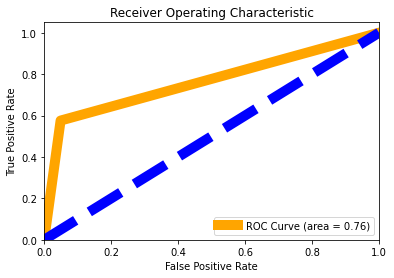

In [83]:
plt.figure()
plt.plot(fpr, tpr, color='orange',lw=10, label = "ROC Curve (area = %0.2f)" %roc_auc)
plt.plot([0,1],[0,1], color='Blue', lw=10, linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")

In [84]:
a = np.array(Y_test)
predicted = np.array(GSCV.best_estimator_.predict(X_test))
comp = pd.DataFrame({"Original":a, "Predicted":predicted}, index = range(len(a)))

In [85]:
comp

,Original,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
314,1,0
315,0,0
316,0,0
317,0,0


In [86]:
print(accuracy_score(Y_test, GSCV_predict)*100)
print('\n')
print(classification_report(Y_test, GSCV_predict))
print('\n')
print(confusion_matrix(Y_test, GSCV_predict))
print('\n')
print(auc(fpr,tpr)*100)

91.22257053291536


              precision    recall  f1-score   support

           0       0.95      0.95      0.95       286
           1       0.58      0.58      0.58        33

    accuracy                           0.91       319
   macro avg       0.76      0.76      0.76       319
weighted avg       0.91      0.91      0.91       319



[[272  14]
 [ 14  19]]


76.34032634032634


In [87]:
print(classification_report(Y_test, predrfc))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       286
           1       0.80      0.61      0.69        33

    accuracy                           0.94       319
   macro avg       0.88      0.79      0.83       319
weighted avg       0.94      0.94      0.94       319



In [88]:
para = {'max_depth':np.arange(2,15),
        'criterion':['gini','entropy'],
        'n_estimators':[100,200,300]
       }

In [89]:
GSCVRFC = GridSearchCV(rfc, para)

In [90]:
GSCVRFC.fit(X_train, Y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'n_estimators': [100, 200, 300]})

In [91]:
GSCVRFC_predict = GSCVRFC.best_estimator_.predict(X_test)

In [92]:
accuracy_score(Y_test, GSCVRFC_predict)

0.9467084639498433

In [93]:
print(classification_report(Y_test, GSCVRFC_predict))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       286
           1       0.79      0.67      0.72        33

    accuracy                           0.95       319
   macro avg       0.87      0.82      0.85       319
weighted avg       0.94      0.95      0.94       319



In [94]:
fpr1, tpr1, thresholds1=roc_curve(Y_test, GSCVRFC_predict)

In [95]:
auc(fpr1, tpr1)

0.8228438228438228

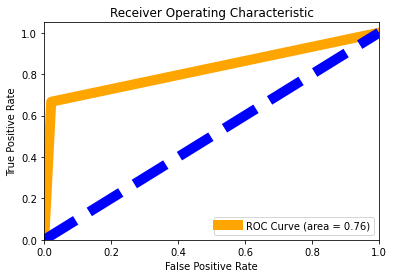

In [96]:
plt.figure()
plt.plot(fpr1, tpr1, color='orange',lw=10, label = "ROC Curve (area = %0.2f)" %roc_auc)
plt.plot([0,1],[0,1], color='Blue', lw=10, linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")

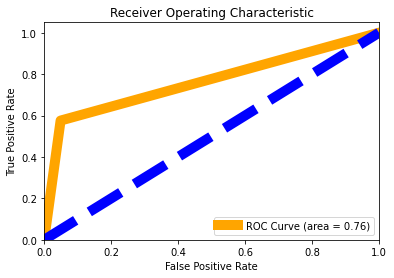

In [97]:
plt.figure()
plt.plot(fpr, tpr, color='orange',lw=10, label = "ROC Curve (area = %0.2f)" %roc_auc)
plt.plot([0,1],[0,1], color='Blue', lw=10, linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")

In [99]:
joblib.dump(GSCVRFC.best_estimator_, 'RedWineQuality.pkl')

['RedWineQuality.pkl']